In [11]:
from __future__ import print_function

In [4]:
figure_folder = 'figures/010_investigate_weird_negative_diagonal'
! mkdir -p $figure_folder

In [12]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



%matplotlib inline


import flotilla
sns.set(style='white', context='paper')

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

In [13]:
miso_outrigger_comparison = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/miso_psi_comparison_junction_reads2d.csv')
print(miso_outrigger_comparison.shape)
miso_outrigger_comparison.head()

(1445316, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,9.0,NaN,NaN,NaN,NaN,SE
1,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,7.0,NaN,NaN,NaN,NaN,SE
2,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,NaN,Case 4: Only one junction with sufficient reads,Case 4,NaN,NaN,NaN,23.0,NaN,NaN,SE
3,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,NaN,Case 3: All junctions with insufficient reads,Case 3,5.0,NaN,NaN,NaN,NaN,NaN,SE
4,chr10:100186972:100187021:-@chr10:100185575:10...,P2_12,0.98,1.0,Case 7: Inclusion,Case 7,32.0,NaN,NaN,46.0,NaN,NaN,SE


In [14]:
case_order = ['Case {}'.format(i+1) for i in range(8)] + ['Case {}{}'.format(i+1, x) for i in range(8, 11) for x in 'ab']
case_order

['Case 1',
 'Case 2',
 'Case 3',
 'Case 4',
 'Case 5',
 'Case 6',
 'Case 7',
 'Case 8',
 'Case 9a',
 'Case 9b',
 'Case 10a',
 'Case 10b',
 'Case 11a',
 'Case 11b']

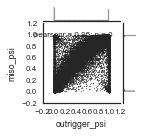

In [15]:
g = sns.jointplot('outrigger_psi', 'miso_psi', miso_outrigger_comparison, color='#262626', 
                  joint_kws=dict(alpha=0.5, rasterized=True, s=1), size=2)
g.savefig('{}/outrigger_vs_miso_psi.pdf'.format(figure_folder), dpi=300)

In [16]:
miso_outrigger_comparison_fillna = miso_outrigger_comparison.fillna(-0.1)
print(miso_psi_comparison_dropna_fillna.shape)
miso_outrigger_comparison_fillna.head()

(1445316, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,-0.1,Case 3: All junctions with insufficient reads,Case 3,-0.1,9.0,-0.1,-0.1,-0.1,-0.1,SE
1,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,-0.1,Case 3: All junctions with insufficient reads,Case 3,-0.1,7.0,-0.1,-0.1,-0.1,-0.1,SE
2,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,-0.1,Case 4: Only one junction with sufficient reads,Case 4,-0.1,-0.1,-0.1,23.0,-0.1,-0.1,SE
3,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,-0.1,Case 3: All junctions with insufficient reads,Case 3,5.0,-0.1,-0.1,-0.1,-0.1,-0.1,SE
4,chr10:100186972:100187021:-@chr10:100185575:10...,P2_12,0.98,1.0,Case 7: Inclusion,Case 7,32.0,-0.1,-0.1,46.0,-0.1,-0.1,SE


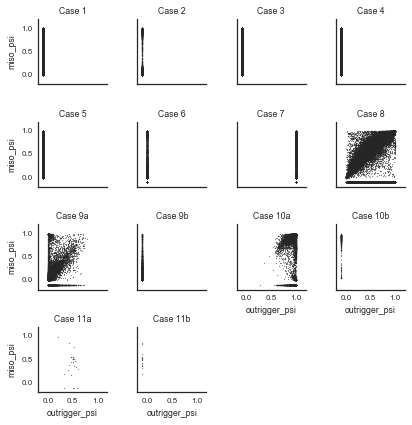

In [18]:
g = sns.FacetGrid(miso_psi_comparison_dropna_fillna, col='notes_abbrev', col_wrap=4, col_order=case_order, size=1.5)
g.map(plt.scatter, 'outrigger_psi', 'miso_psi', alpha=0.5, color='#262626', rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
g.savefig('{}/outrigger_vs_miso_psi_faceted.pdf'.format(figure_folder), dpi=300)

In [27]:
miso_psi_comparison_dropna_fillna['either_na'] = miso_outrigger_comparison[['outrigger_psi', 'miso_psi']].isnull().any(axis=1)
miso_psi_comparison_dropna_fillna.head()

,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type,any_na,either_na
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,-0.1,Case 3: All junctions with insufficient reads,Case 3,-0.1,9.0,-0.1,-0.1,-0.1,-0.1,SE,True,True
1,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,-0.1,Case 3: All junctions with insufficient reads,Case 3,-0.1,7.0,-0.1,-0.1,-0.1,-0.1,SE,True,True
2,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,-0.1,Case 4: Only one junction with sufficient reads,Case 4,-0.1,-0.1,-0.1,23.0,-0.1,-0.1,SE,True,True
3,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,-0.1,Case 3: All junctions with insufficient reads,Case 3,5.0,-0.1,-0.1,-0.1,-0.1,-0.1,SE,True,True
4,chr10:100186972:100187021:-@chr10:100185575:10...,P2_12,0.98,1.0,Case 7: Inclusion,Case 7,32.0,-0.1,-0.1,46.0,-0.1,-0.1,SE,False,False


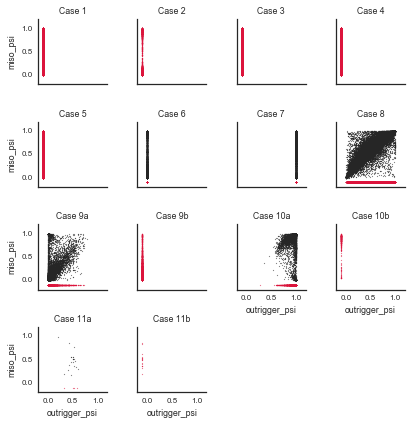

In [32]:
g = sns.FacetGrid(miso_psi_comparison_dropna_fillna, col='notes_abbrev', 
                  col_wrap=4, col_order=case_order, size=1.5, hue='either_na', hue_order=[False, True],
                  palette=['#262626', 'crimson'])
g.map(plt.scatter, 'outrigger_psi', 'miso_psi', alpha=0.5, rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
g.savefig('{}/outrigger_vs_miso_psi_faceted_na_hue.pdf'.format(figure_folder), dpi=300)

In [29]:
pd.options.display.max_colwidth = 300

In [31]:
negative_diagonal = miso_outrigger_comparison.query('abs((miso_psi + outrigger_psi) - 1) <= 0.05')
print(negative_diagonal.shape)
negative_diagonal.head(20)

(11938, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
502,chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,P4_11,0.62,0.412371,Case 8: Sufficient reads on all junctions,Case 8,34.0,57.0,NaN,46.0,NaN,NaN,SE
503,chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,P7_07,0.61,0.396040,Case 8: Sufficient reads on all junctions,Case 8,41.0,61.0,NaN,39.0,NaN,NaN,SE
711,chr10:102020723:102020801:-@chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,M1_06,0.03,1.000000,Case 7: Inclusion,Case 7,35.0,NaN,NaN,NaN,17.0,NaN,MXE
722,chr10:102020723:102020801:-@chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,MSA_05,0.01,1.000000,Case 7: Inclusion,Case 7,66.0,NaN,NaN,NaN,50.0,NaN,MXE
730,chr10:102020723:102020801:-@chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,P1_03,1.00,0.000000,Case 6: Exclusion,Case 6,NaN,78.0,4.0,NaN,NaN,57.0,MXE
748,chr10:102020723:102020801:-@chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,N3_04,0.99,0.000000,Case 6: Exclusion,Case 6,NaN,83.0,NaN,NaN,NaN,67.0,MXE
754,chr10:102020723:102020801:-@chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,P4_09,0.97,0.000000,Case 6: Exclusion,Case 6,NaN,12.0,NaN,NaN,NaN,14.0,MXE
1714,chr10:102747070:102747272:-@chr10:102746847:102746953:-@chr10:102746506:102746732:-@chr10:102743705:102743831:-,N1_05,0.00,1.000000,Case 7: Inclusion,Case 7,461.0,NaN,NaN,NaN,692.0,NaN,MXE
2850,chr10:103563492:103563776:-@chr10:103559999:103560157:-@chr10:103558599:103559212:-,CVN_22,0.59,0.420000,Case 8: Sufficient reads on all junctions,Case 8,24.0,29.0,NaN,18.0,NaN,NaN,SE
3246,chr10:103567487:103567658:-@chr10:103565802:103565900:-@chr10:103563492:103563776:-@chr10:103559999:103560157:-,P4_01,0.98,0.000000,Case 6: Exclusion,Case 6,NaN,27.0,NaN,4.0,NaN,28.0,MXE


In [36]:
(110. + 141)/(110 + 141 + 2*339)

0.27018299246501615

In [34]:
negative_diagonal_not_zero_one = negative_diagonal.query('(miso_psi != 1) & (miso_psi != 0) & (outrigger_psi != 1)& (outrigger_psi != 0)')
print(negative_diagonal_not_zero_one.shape)
negative_diagonal_not_zero_one.head(20)

(2310, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
502,chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,P4_11,0.62,0.412371,Case 8: Sufficient reads on all junctions,Case 8,34.0,57.0,NaN,46.0,NaN,NaN,SE
503,chr10:102019975:102020076:-@chr10:102016019:102016233:-@chr10:102013178:102013296:-,P7_07,0.61,0.396040,Case 8: Sufficient reads on all junctions,Case 8,41.0,61.0,NaN,39.0,NaN,NaN,SE
2850,chr10:103563492:103563776:-@chr10:103559999:103560157:-@chr10:103558599:103559212:-,CVN_22,0.59,0.420000,Case 8: Sufficient reads on all junctions,Case 8,24.0,29.0,NaN,18.0,NaN,NaN,SE
5747,chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-,MSA_14,0.74,0.270183,Case 8: Sufficient reads on all junctions,Case 8,110.0,339.0,NaN,141.0,NaN,NaN,SE
5789,chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-,P1_05,0.70,0.276382,Case 8: Sufficient reads on all junctions,Case 8,119.0,360.0,NaN,156.0,NaN,NaN,SE
5808,chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-,P2_13,0.81,0.235231,Case 8: Sufficient reads on all junctions,Case 8,104.0,356.0,NaN,115.0,NaN,NaN,SE
5835,chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-,M4_05,0.80,0.240711,Case 8: Sufficient reads on all junctions,Case 8,58.0,235.0,NaN,91.0,NaN,NaN,SE
5836,chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-,M4_06,0.71,0.266846,Case 8: Sufficient reads on all junctions,Case 8,44.0,136.0,NaN,55.0,NaN,NaN,SE
5839,chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-,M4_13,0.69,0.311604,Case 8: Sufficient reads on all junctions,Case 8,105.0,264.0,NaN,134.0,NaN,NaN,SE
5843,chr10:105156166:105156270:-@chr10:105155503:105155789:-@chr10:105152128:105152223:-,N3_02,0.73,0.294118,Case 8: Sufficient reads on all junctions,Case 8,90.0,204.0,NaN,80.0,NaN,NaN,SE
